In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Ratios_v2.csv')

/Users/yuxingcai/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4,8,11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'RECORD', 'BBLE', 'B',
       'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT',
       'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND',
       'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH',
       'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR',
       'VALTYPE', 'ZIP3', 'LOTAREA', 'BLDAREA', 'BLDVOL', 'R1', 'R2', 'R3',
       'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R1_by_ZIP', 'R2_by_ZIP',
       'R3_by_ZIP', 'R4_by_ZIP', 'R5_by_ZIP', 'R6_by_ZIP', 'R7_by_ZIP',
       'R8_by_ZIP', 'R9_by_ZIP', 'R1_by_ZIP3', 'R2_by_ZIP3', 'R3_by_ZIP3',
       'R4_by_ZIP3', 'R5_by_ZIP3', 'R6_by_ZIP3', 'R7_by_ZIP3', 'R8_by_ZIP3',
       'R9_by_ZIP3', 'R1_by_TAXCLASS', 'R2_by_TAXCLASS', 'R3_by_TAXCLASS',
       'R4_by_TAXCLASS', 'R5_by_TAXCLASS', 'R6_by_TAXCLASS', 'R7_by_TAXCLASS',
       'R8_by_TAXCLASS', 'R9_by_TAXCLASS', 'R1_by_B', 'R2_by_B', 'R3_by_B',
       'R4_by_B',

In [4]:
# Get names of 45 columns
z_cols = []
for i in range(9):
    for j in ['ZIP', 'ZIP3', 'TAXCLASS', 'B', 'ALL']:
        z_cols.append(f'R{i+1}_by_{j}')
z_cols

['R1_by_ZIP',
 'R1_by_ZIP3',
 'R1_by_TAXCLASS',
 'R1_by_B',
 'R1_by_ALL',
 'R2_by_ZIP',
 'R2_by_ZIP3',
 'R2_by_TAXCLASS',
 'R2_by_B',
 'R2_by_ALL',
 'R3_by_ZIP',
 'R3_by_ZIP3',
 'R3_by_TAXCLASS',
 'R3_by_B',
 'R3_by_ALL',
 'R4_by_ZIP',
 'R4_by_ZIP3',
 'R4_by_TAXCLASS',
 'R4_by_B',
 'R4_by_ALL',
 'R5_by_ZIP',
 'R5_by_ZIP3',
 'R5_by_TAXCLASS',
 'R5_by_B',
 'R5_by_ALL',
 'R6_by_ZIP',
 'R6_by_ZIP3',
 'R6_by_TAXCLASS',
 'R6_by_B',
 'R6_by_ALL',
 'R7_by_ZIP',
 'R7_by_ZIP3',
 'R7_by_TAXCLASS',
 'R7_by_B',
 'R7_by_ALL',
 'R8_by_ZIP',
 'R8_by_ZIP3',
 'R8_by_TAXCLASS',
 'R8_by_B',
 'R8_by_ALL',
 'R9_by_ZIP',
 'R9_by_ZIP3',
 'R9_by_TAXCLASS',
 'R9_by_B',
 'R9_by_ALL']

# First Z Scale Transformation

In [5]:
scaler = StandardScaler()
df1 = df[z_cols]
df1 = pd.DataFrame(scaler.fit_transform(df1), columns = z_cols)

In [6]:
df1.describe()

,R1_by_ZIP,R1_by_ZIP3,R1_by_TAXCLASS,R1_by_B,R1_by_ALL,R2_by_ZIP,R2_by_ZIP3,R2_by_TAXCLASS,R2_by_B,R2_by_ALL,...,R8_by_ZIP,R8_by_ZIP3,R8_by_TAXCLASS,R8_by_B,R8_by_ALL,R9_by_ZIP,R9_by_ZIP3,R9_by_TAXCLASS,R9_by_B,R9_by_ALL
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,2.864741e-17,-1.866228e-16,-7.279283e-16,-8.094439e-17,-2.885061e-16,-3.676936e-17,-9.343401e-17,1.091616e-16,-7.330473e-17,4.861229e-18,...,1.500720e-17,-6.233930e-17,1.257546e-16,-3.837954e-17,-7.695321e-17,1.225746e-17,5.228699e-18,1.964247e-16,6.398359e-17,-1.341040e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.251682e-01,-3.391482e-02,-2.940229e-02,-3.281839e-02,-1.306281e-02,-3.070972e-02,-5.179668e-03,-1.663087e-02,-5.209348e-03,-2.115784e-03,...,-2.397555e-02,-4.549727e-03,-1.692238e-02,-4.269783e-03,-1.721713e-03,-2.404176e-02,-4.548568e-03,-1.660108e-02,-4.269325e-03,-1.715946e-03
25%,-7.249414e-02,-3.195729e-02,-2.739914e-02,-3.069569e-02,-1.275809e-02,-3.070809e-02,-5.179663e-03,-1.633015e-02,-5.209342e-03,-2.115781e-03,...,-2.397502e-02,-4.549726e-03,-1.668038e-02,-4.269782e-03,-1.721713e-03,-2.404145e-02,-4.548568e-03,-1.647222e-02,-4.269324e-03,-1.715946e-03
50%,-2.299195e-02,-2.580181e-02,-1.192494e-02,-2.643781e-02,-1.256105e-02,-3.070284e-02,-5.179576e-03,-6.295322e-03,-5.209328e-03,-2.115780e-03,...,-2.397274e-02,-4.549692e-03,-5.151609e-03,-4.269780e-03,-1.721713e-03,-2.403990e-02,-4.548530e-03,-5.615668e-03,-4.269323e-03,-1.715946e-03
75%,1.735076e-02,-1.755640e-02,-6.310988e-04,-2.073851e-02,-1.226202e-02,-3.067704e-02,-5.179276e-03,-2.271092e-03,-5.209130e-03,-2.115778e-03,...,-2.396168e-02,-4.549504e-03,-5.633552e-04,-4.269701e-03,-1.721712e-03,-2.402974e-02,-4.548339e-03,-1.098735e-03,-4.269156e-03,-1.715946e-03
max,6.086337e+02,5.253550e+02,8.892068e+02,5.136450e+02,9.123155e+02,3.954853e+02,8.383068e+02,8.768793e+02,8.434519e+02,9.086624e+02,...,3.939456e+02,8.509192e+02,8.942170e+02,7.988861e+02,9.094108e+02,3.949963e+02,8.509228e+02,8.799040e+02,7.990072e+02,9.094111e+02


# PCA

In [7]:
pca = PCA()
matrix = df1
pca.fit(matrix)
pca_samples = pca.transform(matrix)

Text(0.5, 0, 'Principal components')

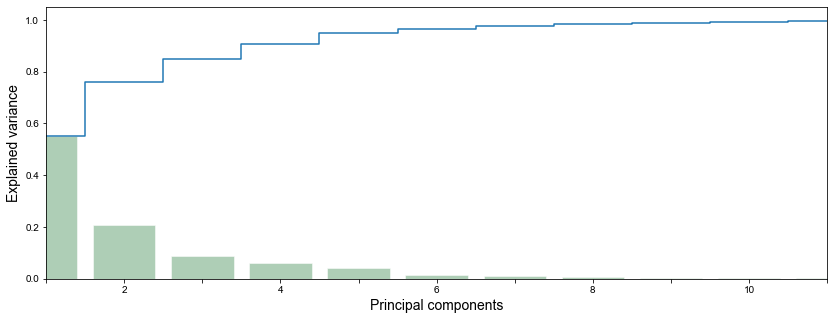

In [8]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
#plt.legend(loc='upper left', fontsize = 13);

In [9]:
df1 = pd.DataFrame(pca_samples).iloc[:,0:5]

In [10]:
df1.describe()

,0,1,2,3,4
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,1.946668e-16,-7.843509e-17,1.281939e-16,1.975903e-16,-2.555506e-16
std,4.978233e+00,3.069714e+00,2.009055e+00,1.631337e+00,1.346406e+00
min,-7.177072e-02,-1.387311e+02,-3.335492e+02,-7.873194e+02,-5.030274e+02
25%,-5.242100e-02,-7.904188e-02,-5.741904e-02,-6.347489e-02,-2.788832e-02
50%,-4.247382e-02,-5.785713e-02,-5.261466e-02,-3.396435e-02,-1.715993e-03
75%,-3.456113e-02,-3.795881e-02,-4.573833e-02,-6.270454e-03,2.753753e-02
max,4.379173e+03,2.295241e+03,7.993188e+02,9.840246e+02,7.756734e+02


# Second Z Scale Transformation

In [11]:
df1 = pd.DataFrame(scaler.fit_transform(df1))

In [12]:
df1.describe()

,0,1,2,3,4
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-3.480106e-17,8.788512e-17,-2.017509e-17,9.912775e-17,6.830511e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.441691e-02,-4.519352e+01,-1.660230e+02,-4.826224e+02,-3.736077e+02
25%,-1.053005e-02,-2.574896e-02,-2.858014e-02,-3.890975e-02,-2.071317e-02
50%,-8.531910e-03,-1.884774e-02,-2.618878e-02,-2.081996e-02,-1.274499e-03
75%,-6.942451e-03,-1.236559e-02,-2.276611e-02,-3.843753e-03,2.045262e-02
max,8.796644e+02,7.477055e+02,3.978584e+02,6.032016e+02,5.761068e+02


# Score 2 Computation (Autoencoder)

In [13]:
df1.head()

,0,1,2,3,4
0,-0.014118,-0.035250,-0.018085,-0.057771,0.043979
1,0.066403,0.255662,-0.174987,1.219237,-1.297856
2,-0.013077,-0.031760,-0.020692,-0.042738,0.027369
3,-0.013936,-0.034337,-0.019152,-0.053920,0.039657
4,-0.009362,-0.024893,-0.019999,-0.012066,-0.006431


In [14]:
clf1 = AutoEncoder(hidden_neurons = [5,2,2,5],epochs=5)
clf1.fit(df1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_3 (Dropout)          (None, 5)                 0         
______________________

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=5,
      hidden_activation='relu', hidden_neurons=[5, 2, 2, 5],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x1a49f81510>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

In [25]:
result = pd.DataFrame(clf1.decision_scores_)

In [26]:
result.to_csv('result.csv')